<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/coherence/ComputationalPhotographyHomework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Photography
### David J. Brady
### University of Arizona

### Homework 1
### Srping 2024





## Homework 1

Homework 1 consists of 4 problems exploring
1. Coherence functions and spectroscopy
2. Mutual coherence of incoherent sources
3. Rotational shear interometry and
4. Spatial resolution

## Libraries

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import color, data, restoration, exposure
from skimage import io
from google.colab import files
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 16})

## Question 1. Coherence functions and spectroscopy

*   Section 6.2 of the text defines coherence functions of the optical field. Describe these functions in your own words. Explain why it is necessary to use these functions and discuss any assumptions related to their definitions.
*   Consider an LED light source emitting light with a center wavelength of 600 nm. The spectrum is distributed according to a Gaussian distribution with standard variation 3 nm. Plot the spectrum of this source and the its mutual coherence function $\Gamma (\tau)$. Make sure to use physical units (e.g. time for $\Gamma (\tau)$) along the horizontal axes of your graphs. Estimate the coherence time (e.g. the value of $\tau$ for which $|\Gamma (\tau )|$ falls to half its maximum) for this source.
*  Measuring with a Michelson interferometer, what path delay $\delta$ corresponds to this coherence time?
* If the LED emits 1 milliwatt of optical power and you observe it at a range of 10 meters using an interferometer with a 1 cm aperture, estimate the number of photons you might measure in a 1 second exposure and the the time bandwidth product for the field over your measurement


## Question 2. Mutual coherence of incoherent sources

Text equation 6.22 describes the cross spectral density of a a Fresnel zone incoherent source as
$$
W(\Delta x,\Delta y, q, \nu )={l^2\over \lambda^2z^2}
e^{-i{2\pi\nu q\over c z}}
\int\int
 S(x,y,\nu )e^{i{2\pi\nu \over c z}(x\Delta x+y\Delta y )}
dxdy
$$
Neglecting constants, the magnitude of the cross spectral density is
$$
|W(\Delta x,\Delta y, q, \nu )|=\left |
\int\int
 S(x,y,\nu )e^{i{2\pi\nu \over c z}(x\Delta x+y\Delta y )}
dxdy\right |
$$

Suppose that $S(x,y,\nu )= f(x,y) e^{-\frac{(\nu - \nu_o)^2}{\sigma^2}}$, where $\nu_0=500$ THz and $\sigma= 5$ THz. $f(x,y)$ is a spatial pattern showing the number 3 such that the number is approximately 3 mm high.


*   What is the center wavelength of the spectral distribution? What is the width of the spectral in nm? What color is this?
*   For this system, plot $\left |W(\Delta x,\Delta y, q, \nu )\right |$ at a range of 1 meter and at a range of 10 meters, with plot axes in appropriate spatial units.
*  Estimate the coherence cross section at a range of 1 meter and at a range of 10 meters.
*  Discuss and explain your results.





### Solution

$W(\Delta x, \Delta y, \nu)$ is a 3d function, but the $\nu$ component simply multiplies the overall pattern by the spectrum $e^{-\frac{(\nu - \nu_o)^2}{\sigma^2}}$, so we focus here on creating an image of the spatial distribution
$$
|W(\Delta x,\Delta y, q, \nu )|=\left |
\int\int
f(x,y)e^{i{2\pi \over \lambda z}(x\Delta x+y\Delta y )}
dxdy\right |
$$
where $f(x,y)$ is the number 3. I created a number 3 pattern by sketching it on my phone and the uploading it. Let's have a look.

Text(0.5, 1.0, 'number 3')

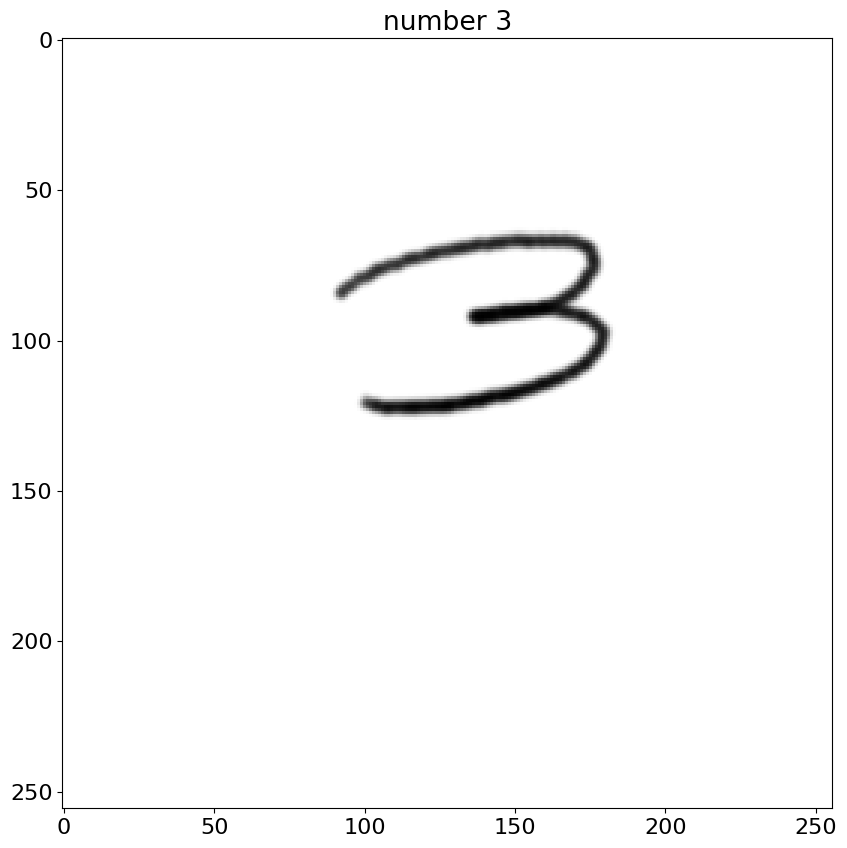

In [30]:
three=plt.imread('3.png')
three=three[:,:,0]
plt.imshow(three,cmap='gray')
plt.title('number 3')

In [34]:
three=np.pad(three,((896,896),(896,896)),'constant',constant_values=0)

In [35]:
three.shape

(2048, 2048)

The image zero padded to get to 2048 by 2048. The three is about 75 pixels tall, lets assume that the spatial scale is 3*2048/75=82 mm so that the three corresponds to around 3 mm.This means that the spacing between pixels is $\frac{82}{2048}=40 \mu$m.  $\lambda$ is 600 nm. The only difference between the cross spectral density at 1 m and 10 m is the spatial scale. $W(\Delta x, \Delta y)$ is proportional to the Fourier transform of $f(x,y)$ evaluated at $\Delta x= u \lambda z$

In showing the transform we suppress the dc component, which is by far the strongest term.

One broadly expects the coherence cross section to be $\frac{\lambda}{\Delta \theta}$, where $\Delta \theta$ is the angular extent of the source. Here, $\Delta\theta=\frac{0.003}{1}$ at one meter, so the cross section should be around .2 mm at 1 meter and 2 mm at 10 meter.

Text(0, 0.5, 'mm')

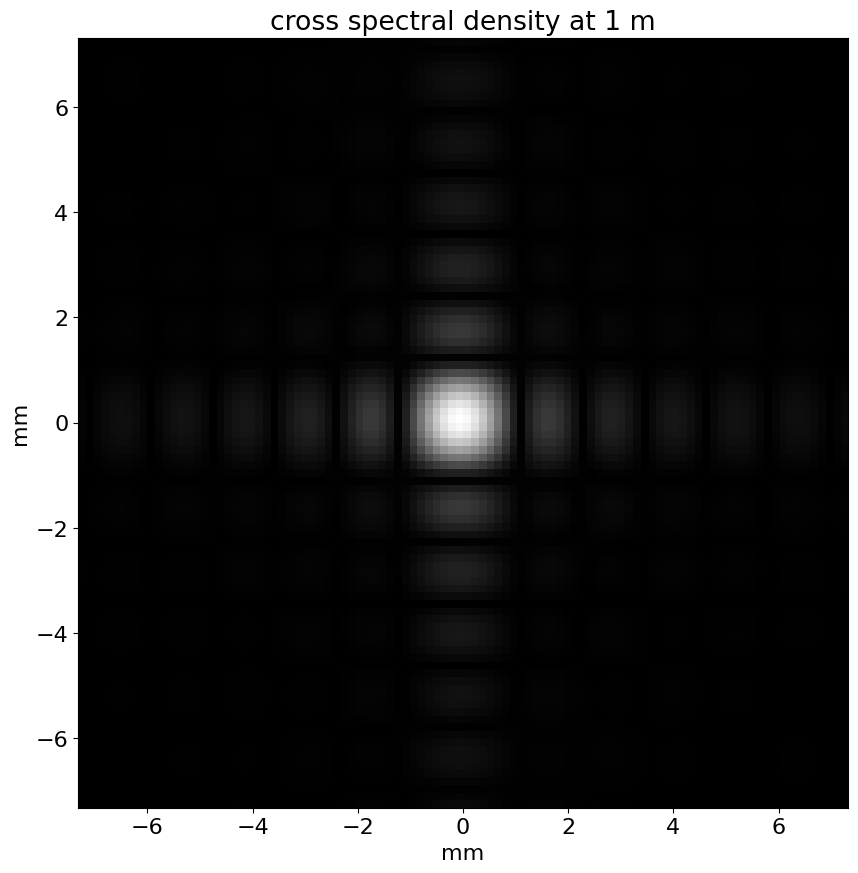

In [40]:
umax=2048/0.0082 #inverse meters
lam=6*10**-7
z=1
dXmax=1000*umax*lam*z
dXmax=100*dXmax/2048
W=np.abs(np.fft.fftshift(np.fft.fft2(three)))
plt.imshow(W[975:1075,975:1075],cmap='gray', extent=[-dXmax,dXmax,-dXmax,dXmax])
plt.title('cross spectral density at 1 m')
plt.xlabel('mm')
plt.ylabel('mm')

Text(0, 0.5, 'mm')

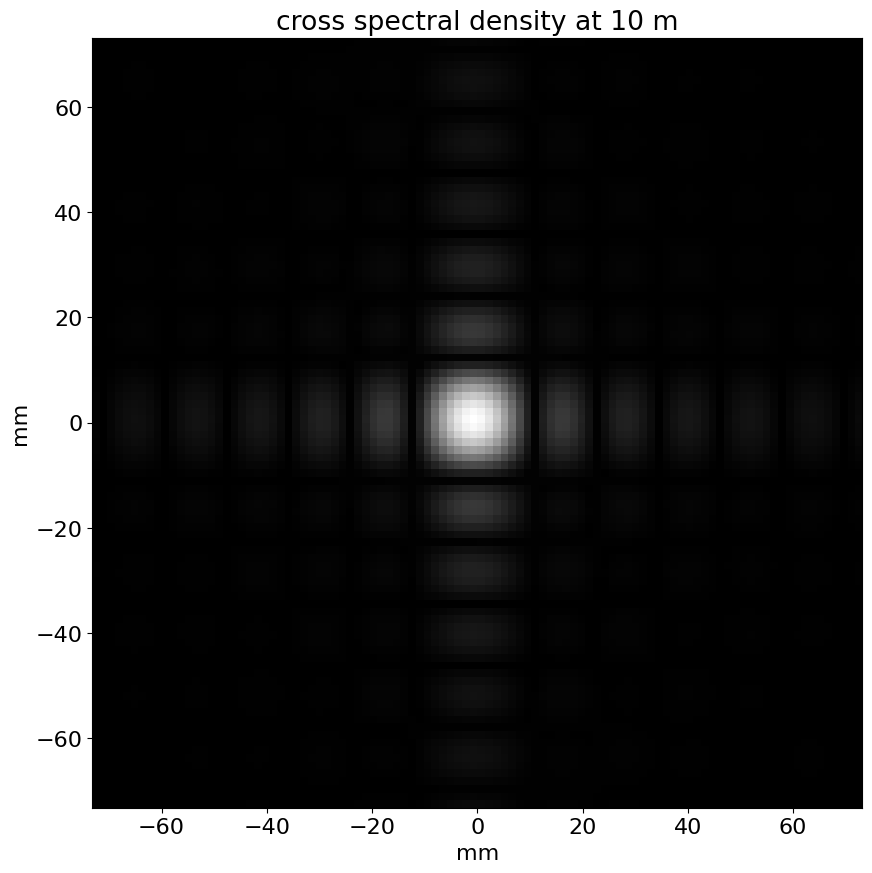

In [41]:
umax=2048/0.0082 #inverse meters
lam=6*10**-7
z=10
dXmax=1000*umax*lam*z
dXmax=100*dXmax/2048
W=np.abs(np.fft.fftshift(np.fft.fft2(three)))
plt.imshow(W[975:1075,975:1075],cmap='gray', extent=[-dXmax,dXmax,-dXmax,dXmax])
plt.title('cross spectral density at 10 m')
plt.xlabel('mm')
plt.ylabel('mm')

In [38]:
3/75

0.04

## Question 3. Rotational shear interferometry


*   Figure 6.6 in the text shows experimental rotational shear interferometer data, but physical units are missing on the plots. Try to replicate this image using a model for the spectrum with Gaussian peaks representing each of the peaks in the left spectral traces. Assume that the spectral peaks for the upper trace are at 450, 525 and 625 nm. For the lower spectrum assume 500 and 600 nm. Assume that the sources are 2 meters from the RSI. Deterimine the angular placement of the sources needed to create the RSI image and the pixel pitch (in microns) on the RSI.
*   Create a model image of the RSI pattern for observing the source of problem 2 at a range of 20 cm.



### Solution

For a remote point target,  the RSI image is
$$
I(x,y)= 0.5 + 0.25 \Gamma(2\frac{x\theta_x +y\theta_y}{c})+0.25 \Gamma(-2\frac{x\theta_x +y\theta_y}{c})
$$
for the each source
$$S(\nu)= \sum s_\nu e^{-\pi\frac{(\nu-\nu_o)^2}{\sigma_\nu^2}}$$
where the sum is over 2 or three spectral lines.
In each case
$$\Gamma(\tau)= \sum s_\nu e^{2\pi \tau\nu}e^{-\pi\sigma_\nu^2\tau^2}$$


### spectrum and coherence  of the first source

Text(0, 0.5, 'coherence')

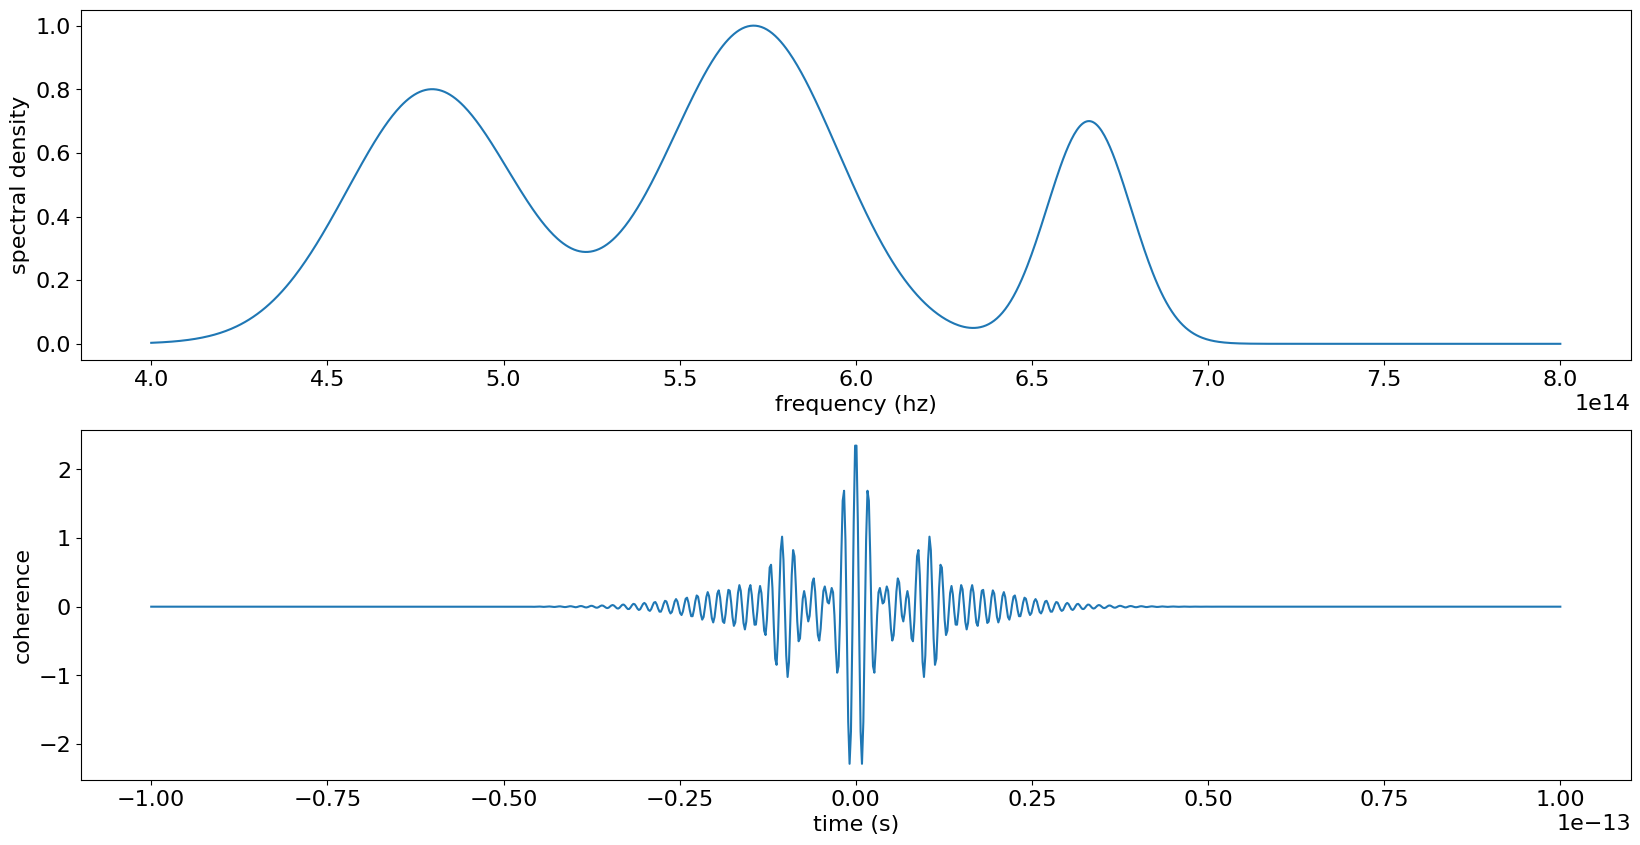

In [ ]:

c=299792458
spec=np.linspace(400,800,1024)*10**(12)
nu1=c/(450*10**(-9))
nu2=c/(525*10**(-9))
nu3=c/(625*10**(-9))
sigma=3.*10**13
snu=.7*np.exp(-np.pi*(spec-nu1)**2/sigma**2)
snu=snu+np.exp(-np.pi*(spec-nu2)**2/(4*sigma**2))
snu=snu+.8*np.exp(-np.pi*(spec-nu3)**2/(4*sigma**2))
plt.subplot(2,1, 1)
plt.plot(spec,snu)
plt.xlabel('frequency (hz)')
plt.ylabel('spectral density')
tau=np.linspace(-1,1,1024)*10**(-13)
def gamma(tau,nu1,nu2,nu3,sigma):
  gamma=.7*np.exp(-np.pi*sigma**2*tau**2)*np.exp(1j*2*np.pi*tau*nu1)
  gamma=gamma+np.exp(-np.pi*4*sigma**2*tau**2)*np.exp(1j*2*np.pi*tau*nu2)
  gamma=gamma+.8*np.exp(-np.pi*4*sigma**2*tau**2)*np.exp(1j*2*np.pi*tau*nu3)
  return gamma
gamma1=gamma(tau,nu1,nu2,nu3,sigma)
plt.subplot(2,1,2)
plt.plot(tau,np.real(gamma1))
plt.xlabel('time (s)')
plt.ylabel('coherence')

### spectrum and coherence of the second source

Text(0, 0.5, 'coherence')

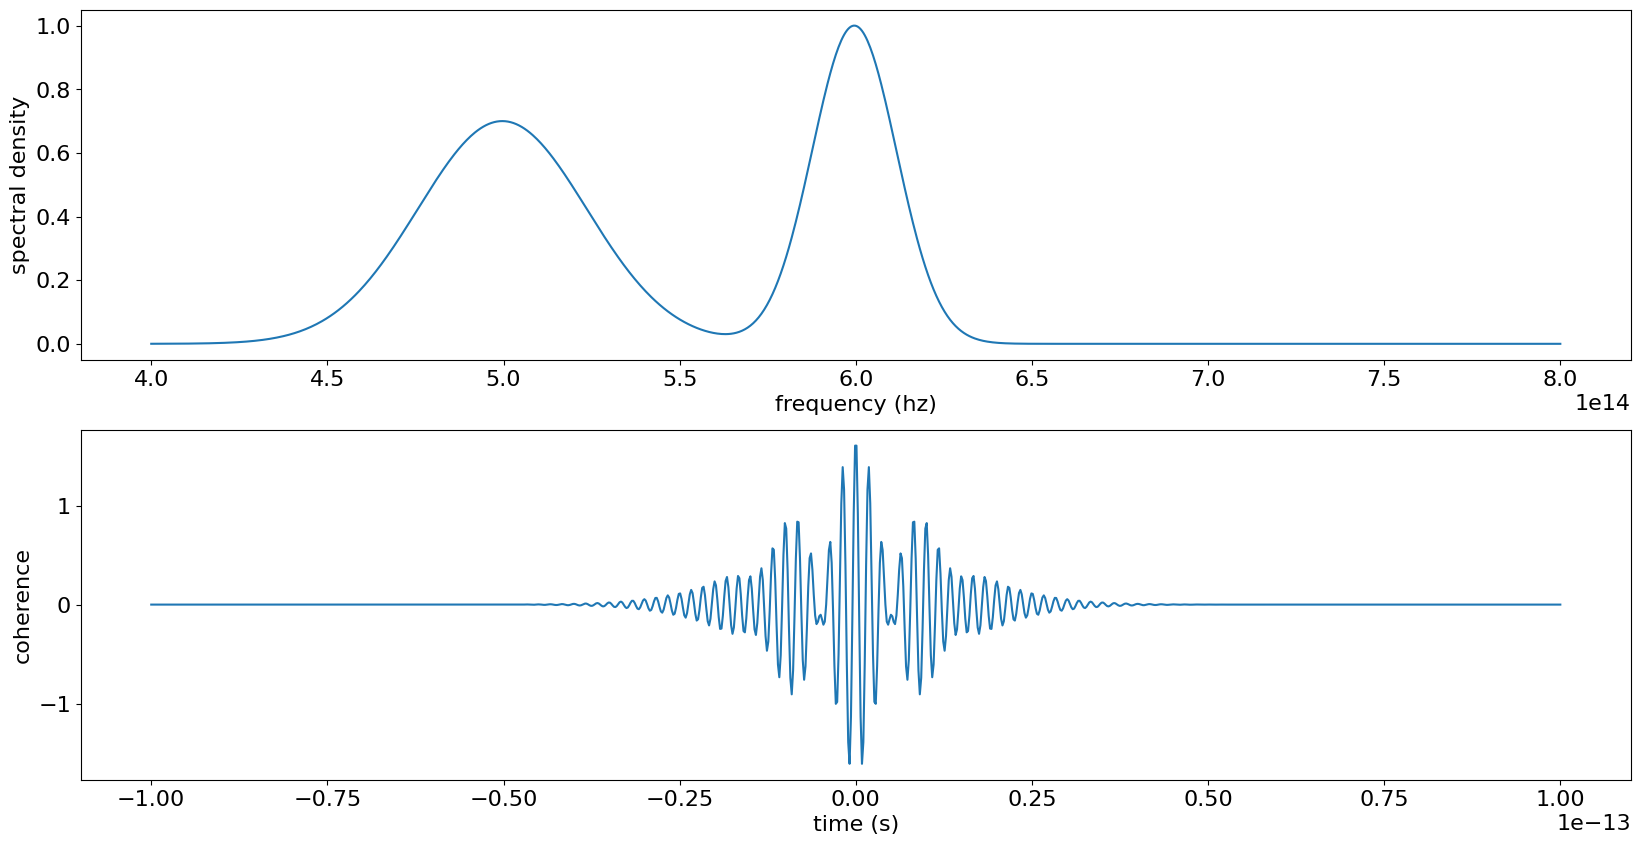

In [ ]:

c=299792458
spec=np.linspace(400,800,1024)*10**(12)
nu12=c/(500*10**(-9))
nu22=c/(600*10**(-9))
sigma=3.*10**13
snu=np.exp(-np.pi*(spec-nu12)**2/sigma**2)
snu=snu+.7*np.exp(-np.pi*(spec-nu22)**2/(4*sigma**2))
plt.subplot(2,1, 1)
plt.plot(spec,snu)
plt.xlabel('frequency (hz)')
plt.ylabel('spectral density')
tau=np.linspace(-1,1,1024)*10**(-13)
def gamma2(tau,nu1,nu2,sigma):
  gamma=.7*np.exp(-np.pi*sigma**2*tau**2)*np.exp(1j*2*np.pi*tau*nu1)
  gamma=gamma+np.exp(-np.pi*4*sigma**2*tau**2)*np.exp(1j*2*np.pi*tau*nu2)
  return gamma
gamma22=gamma2(tau,nu12,nu22,sigma)
plt.subplot(2,1,2)
plt.plot(tau,np.real(gamma22))
plt.xlabel('time (s)')
plt.ylabel('coherence')

### RSI image

Text(0.5, 1.0, 'RSI image')

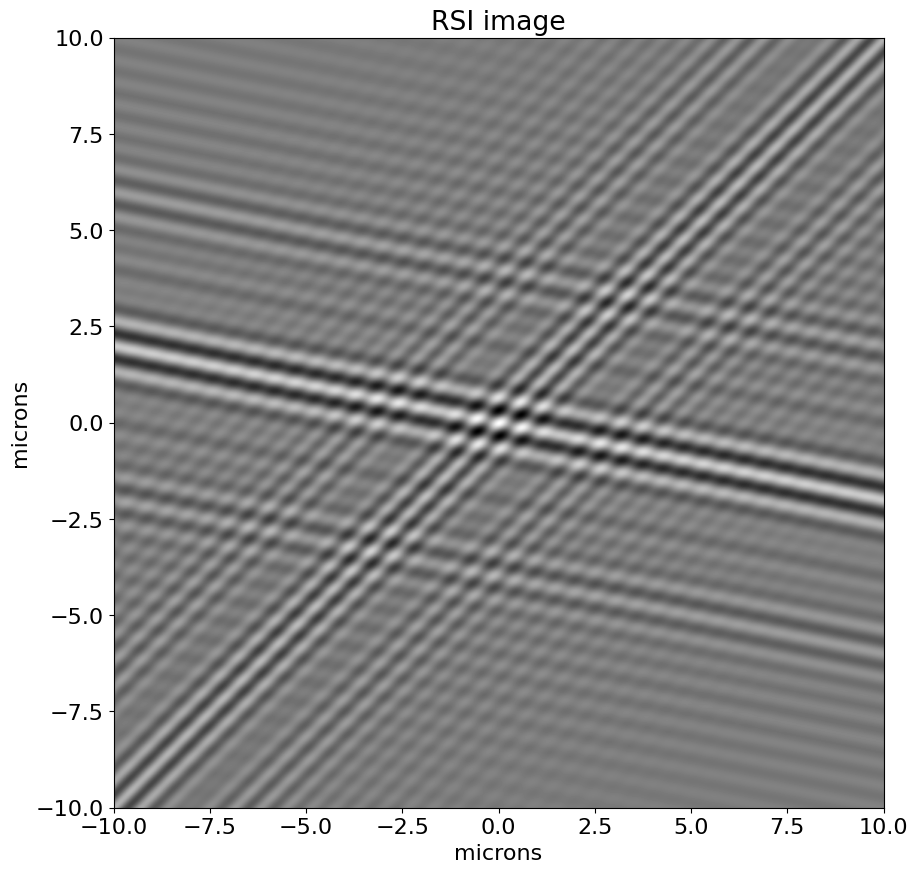

In [ ]:
from re import T
x=np.linspace(-10,10,1024)*10**(-6)
x,y=np.meshgrid(x,x)
thetax1=.05*np.pi
thetay1=-.25*np.pi
thetax2=.25*np.pi
thetay2=.25*np.pi
plt.imshow(2+np.real(gamma((x*thetax1+y*thetay1)/c,nu1,nu2,nu3,sigma)+gamma2((x*thetax2+y*thetay2)/c,nu12,nu22,sigma)),cmap='gray', extent=[-10,10,-10,10])
plt.xlabel('microns')
plt.ylabel('microns')
plt.title('RSI image')

here we choose $\theta_x$ and $\theta_y$ for each source to match the figure in the text. Without knowning the pixel pitch, one can only find the relative values of $\theta_x$ and $\theta_y$. Under the assumptions here and assuming that the above figure matches the text, the incidence angles are 9 and -45 degrees for source 1 and -45 degrees along both axes for source 2.  

## Question 4. Spatial Resolution



*   Estimate the transverse and longitudinal resolution of a confocal microscope with a 1 mm aperture and a 1 mm working distance.
*   Estimate the transverse and longitudinal resolution of a camera with 1 cm apeture imaging objects at a range of 1 meter.
*   Diffraction limited optical resolution depends only on the aperture extent, not on physical processing. Explain why.
*   Discuss algorithmic and coding strategies for increasing resolution.
